In [1]:
s1 = raw_input("\nPlease, type the first string: ")
s2 = raw_input("\nPlease, type the second string: ")


Please, type the first string: asdsssss

Please, type the second string: addddss


In [2]:
def dot_matrix(s1, s2, char = '\\'):
    matrix = []
    r, c = len(s1), len(s2)
    for i in range(0, r):
        matrix.append('')
        for j in range(0, c):
            matrix[i] += (' ')
            
    for i in range(0, r):
        for j in range(0, c):
            if s1[i] == s2[j]:
                new = matrix[i][:j] + char + matrix[i][j+1:]
                matrix[i] = new
    
    return matrix

def print_dot_matrix(matrix, s1, s2):
    print(' ', s2)
    r = len(s1)
    for i in range(0, r):
        print(s1[i], matrix[i])    

In [6]:
print_dot_matrix(dot_matrix(s1, s2), s1, s2)

  aaggagagagagagagagaaag
a \\  \ \ \ \ \ \ \ \\\ 
a \\  \ \ \ \ \ \ \ \\\ 
a \\  \ \ \ \ \ \ \ \\\ 
g   \\ \ \ \ \ \ \ \   \
g   \\ \ \ \ \ \ \ \   \
a \\  \ \ \ \ \ \ \ \\\ 
g   \\ \ \ \ \ \ \ \   \
a \\  \ \ \ \ \ \ \ \\\ 
a \\  \ \ \ \ \ \ \ \\\ 
g   \\ \ \ \ \ \ \ \   \
g   \\ \ \ \ \ \ \ \   \
a \\  \ \ \ \ \ \ \ \\\ 
g   \\ \ \ \ \ \ \ \   \
a \\  \ \ \ \ \ \ \ \\\ 
g   \\ \ \ \ \ \ \ \   \
a \\  \ \ \ \ \ \ \ \\\ 
g   \\ \ \ \ \ \ \ \   \
g   \\ \ \ \ \ \ \ \   \
a \\  \ \ \ \ \ \ \ \\\ 
g   \\ \ \ \ \ \ \ \   \
a \\  \ \ \ \ \ \ \ \\\ 
g   \\ \ \ \ \ \ \ \   \


In [18]:
import sys 

sys.version_info

sys.version_info(major=2, minor=7, micro=13, releaselevel='final', serial=0)

In [24]:
from random import randint
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import colorsys
import numpy as np
import operator


Q = 30
P = 6
A, B = -2, 2

range_width = B - A + 1

def obj_function(matrix):
    total = 0
    for i in range(len(matrix) - 1):
        for j in range(len(matrix[i]) - 1):
            total += abs(matrix[i][j] - matrix[i][j+1]) + abs(matrix[i][j] - matrix[i+1][j]) +  abs(matrix[i][j] - matrix[i+1][j+1])
    return total

def newAnswer(a=-2, b=2):
    return randint(a, b)

# Generate a random matrix of answers
matrix = []
for i in range(Q):
    matrix.append([])
    for j in range(P):
        matrix[i].append(newAnswer(A, B))

first_matrix = matrix
print "Obj Function of initial matrix:", obj_function(first_matrix)

Obj Function of initial matrix: 727


In [40]:
# Try to sort in some way the matrix ============================================================
# Sort the rows:
# how to do it? By value of a single row (from bad rows to good rows)
# or by similarity between rows
# From bad to good

def sort_matrix_by_row_goodness(matrix):
    row_goodness = {}
    for r in range(len(matrix)):
        good_el = sum([x**2 for x in matrix[r] if x > 0])
        bad_el = sum([x**2 for x in matrix[r] if x < 0])
        row_goodness[r] = bad_el + good_el
    sorted_row_good = sorted(row_goodness.items(), key=operator.itemgetter(1))

    matrix_row_sorted = []
    for i in range(len(sorted_row_good)):
        row = sorted_row_good[i][0]
        matrix_row_sorted.append(matrix[row])

    return np.array(matrix_row_sorted)

matrix_row_goodness = sort_by_row_goodness(first_matrix)
print "Obj Function of initial matrix:", obj_function(first_matrix)
print "Obj Function of matrix sorted by row goodness:", obj_function(matrix_row_goodness)

Obj Function of initial matrix: 727
Obj Function of matrix sorted by row goodness: 689


In [41]:
# Sort the columns
# From the low varying to the high varying
def list_variance(lis):
    var = 0
    for i in range(len(lis)-1):
        var += np.abs(lis[i] - lis[i+1])
    return var

def sort_matrix_by_col_variance(matrix):
    matrix_t = np.array(matrix).transpose()
    columns_variance = {}
    for c in range(len(matrix_t)):
        columns_variance[c] = list_variance(matrix_t[c])
    sorted_col_var = sorted(columns_variance.items(), key=operator.itemgetter(1))

    matrix_t_sorted = []
    for i in range(len(sorted_col_var)):
        col = sorted_col_var[i][0]
        matrix_t_sorted.append(matrix_t[col])
    return np.array(matrix_t_sorted).transpose()

matrix_row_goodness_col_variance = sort_matrix_by_col_variance(matrix_row_goodness)
matrix_col_variance = sort_matrix_by_col_variance(first_matrix)

print "Obj Function of initial matrix:", obj_function(first_matrix)
print "Obj Function of matrix sorted by row goodness:", obj_function(matrix_row_goodness)
print "Obj Function of matrix sorted by row goodness and col variance:", obj_function(matrix_row_goodness_col_variance)
print "Obj Function of matrix sorted by col variance:", obj_function(matrix_col_variance)

Obj Function of initial matrix: 727
Obj Function of matrix sorted by row goodness: 689
Obj Function of matrix sorted by row goodness and col variance: 663
Obj Function of matrix sorted by col variance: 684


In [44]:
# Sort in the same way of the rows
def sort_matrix_by_col_goodness(matrix):
    col_goodness = {}
    matrix_t =  np.array(matrix).transpose()
    for c in range(len(matrix_t)):
        good_el = sum([x**2 for x in matrix_t[c] if x > 0])
        bad_el = sum([x**5 for x in matrix_t[c] if x < 0])
        col_goodness[c] = sum(matrix_t[c]) + bad_el + good_el
    sorted_col_good = sorted(col_goodness.items(), key=operator.itemgetter(1))

    matrix_col_sorted = []
    for i in range(len(sorted_col_good)):
        col = sorted_col_good[i][0]
        matrix_col_sorted.append(matrix_t[col])
    return np.array(matrix_col_sorted).transpose()

matrix_row_goodness_col_goodness = sort_matrix_by_col_goodness(matrix_row_goodness)
matrix_col_goodness = sort_matrix_by_col_goodness(first_matrix)

print "Obj Function of initial matrix:", obj_function(first_matrix)
print "Obj Function of matrix sorted by row goodness:", obj_function(matrix_row_goodness)
print "Obj Function of matrix sorted by row goodness and col variance:", obj_function(matrix_row_goodness_col_variance)
print "Obj Function of matrix sorted by col variance:", obj_function(matrix_col_variance)
print "Obj Function of matrix sorted by col goodness:", obj_function(matrix_col_goodness)
print "Obj Function of matrix sorted by row goodness and col goodness:", obj_function(matrix_row_goodness_col_goodness)

Obj Function of initial matrix: 727
Obj Function of matrix sorted by row goodness: 689
Obj Function of matrix sorted by row goodness and col variance: 663
Obj Function of matrix sorted by col variance: 684
Obj Function of matrix sorted by col goodness: 707
Obj Function of matrix sorted by row goodness and col goodness: 682


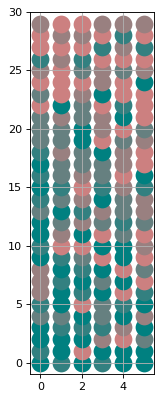

In [46]:
final_matrix = matrix_row_goodness_col_goodness

# Plot something ============================================================
# Create a mapping for the colors and the values
HSV_tuples = [(x*1.0/range_width, 0.5, 0.5) for x in range(range_width)]
RGB_tuples = map(lambda x: colorsys.hsv_to_rgb(*x), HSV_tuples)
color_map = {}
for i in range(A, B+1):
    color_map[i] = HSV_tuples[i-A]

# Do the plot
x_axis = [i for i in range(P)]
y_axis = [i for i in range(Q)]
fig = plt.figure(num=None, figsize=(P/3, Q/5), dpi=80, facecolor='w', edgecolor='k')
for r in range(len(final_matrix)):
    for c in range(len(final_matrix[r])):
        plt.scatter(x_axis[c], y_axis[r], linewidths=10, color=color_map[final_matrix[r][c]])
plt.grid()
plt.axis([x_axis[0]-0.5, x_axis[-1]+0.5, y_axis[0]-1, y_axis[-1]+1])
plt.show()

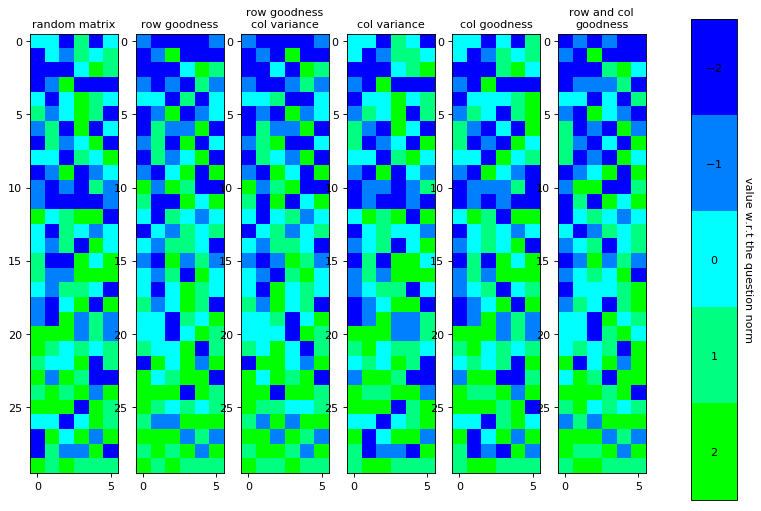

In [48]:
data = [first_matrix, matrix_row_goodness, matrix_row_goodness_col_variance, matrix_col_variance,
        matrix_col_goodness, matrix_row_goodness_col_goodness]
titles = ['random matrix', 'row goodness', 'row goodness\ncol variance', 'col variance', 'col goodness', 'row and col\ngoodness']
# Discrete color scheme
cMap = ListedColormap(['white', 'green', 'blue', 'red'])
colors = ['#0000ff', '#0080ff', '#00ffff', '#00ff80', '#00ff00']
my_cmap = ListedColormap(colors)

# Maybe this one is better =======================================================================
fig, axes = plt.subplots(figsize=(P*1.9, Q), dpi=80, facecolor='w', edgecolor='k', nrows=1, ncols=len(data))

for dat, title, ax in zip(data, titles, axes.flat):
    im = ax.imshow(dat, interpolation='nearest', cmap=my_cmap)
    ax.set_title(title, size = 10)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.4, 0.05, 0.2])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.ax.invert_yaxis()
cbar.ax.get_yaxis().set_ticks([])
for j, lab in enumerate(['$-2$','$-1$','$0$','$1$', '$2$']):
    cbar.ax.text(.5, (2 * j + 1) / 10.0, lab, ha='center', va='center')
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('value w.r.t the question norm', rotation=270)

plt.show()

In [58]:
from scipy.cluster import hierarchy

def sort_by_dendogram(matrix):
    Z = hierarchy.linkage(matrix_row_goodness_col_goodness)
    dn = hierarchy.dendrogram(Z)
    sorted_by_dn = dn['leaves']

    matrix_dn_sorted = []
    for i in range(len(sorted_by_dn)):
        row = sorted_by_dn[i]
        matrix_dn_sorted.append(matrix[row])

    return np.array(matrix_dn_sorted)

matrix_dn_sorted = sort_by_dendogram(matrix_row_goodness_col_goodness)

print "Obj Function of matrix sorted by row and col goodness:", obj_function(matrix_row_goodness_col_goodness)
print "Obj Function of matrix sorted by dendogram:", obj_function(matrix_dn_sorted)

Obj Function of matrix sorted by row and col goodness: 682
Obj Function of matrix sorted by dendogram: 684
